In [1]:
%pylab inline
import pandas as pd
import numpy as np
import nbimporter
from src.funciones import get_datos_simulados,analisis_vacios,leer_archivo, entrenar_modelo,llenar_serie,calcular_correlacion
# librerias para el procesamiento


Populating the interactive namespace from numpy and matplotlib
Importing Jupyter notebook from C:\Users\pchicaiza.FONAG\Documents\hidrologia\src\funciones.ipynb


Using TensorFlow backend.


(array([-372, -252, -132,  -12,  108,  228,  348]),
 <a list of 7 Text xticklabel objects>)

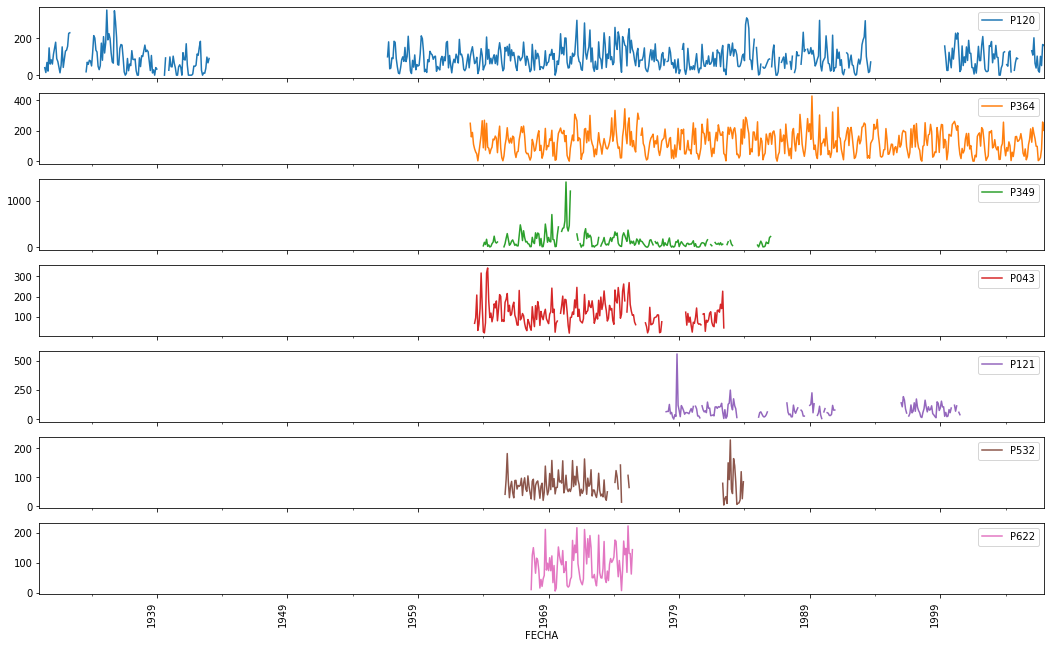

In [2]:
# leer el archivo con la información de la estaciones
archivo = pd.ExcelFile('ESTACIONES.xlsx')
# el orden de las estaciones esta en base al número de años (de mayor a menor)
# P120 datos de 1930 a 2006
# P364 datos de 1963 a 2006
# P349 datos de 1964 a 1986
# P043 datos de 1963 a 1982
# P121 datos de 1978 a 2000
# P532 datos de 1965 a 1983
# P622 datos de 1967 a 1975
todas_estaciones = ['P120','P364','P349','P043','P121','P532','P622']
datos = leer_archivo(archivo,todas_estaciones)
# graficar toda la serie de datos.
# subplot = permite graficar cada serie de manera independiente
# plt.legend = ubicacion de la leyenda
# figsize = relación de aspecto del gráfico
# xticks = Rotación del texto del eje x
datos.loc[:,todas_estaciones].plot(subplots=True, figsize=(18, 12)); plt.legend(loc='best')
xticks(rotation='vertical')

      Porcentaje Vacios  Total de datos  Numero vacios
P120              17.61             528             93
P364               0.19             528              1
P349              57.77             528            305
P043              62.50             528            330
P121              69.70             528            368
P532              76.70             528            405
P622              82.20             528            434


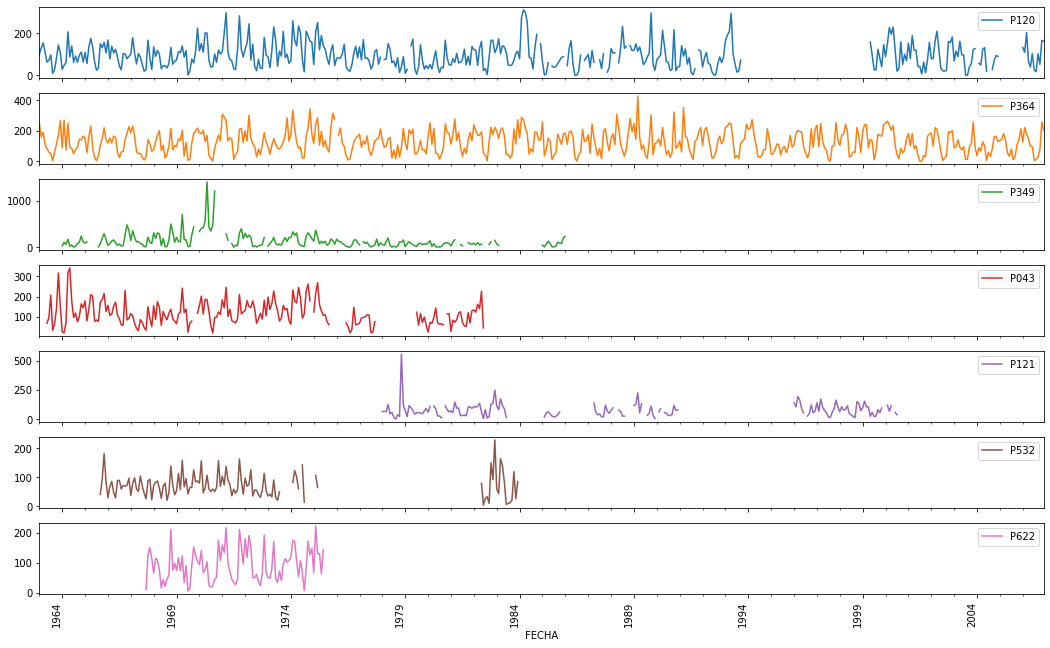

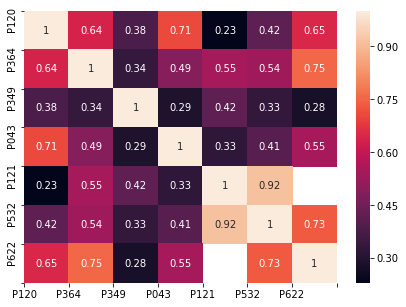

In [3]:
#### Analizar los datos conforme se rellenan
# Periodo de datos para la predicción
inicio = '1963-01-01'
final = '2006-12-01'
rango_prediccion = [inicio,final]
# DataFrame para los datos simulados
datos_simulados = datos.loc[inicio:final,:].copy()
# Graficar los datos
datos_simulados.loc[:,todas_estaciones].plot(subplots=True, figsize=(18, 12)); plt.legend(loc='best')
xticks(rotation='vertical')
# Resumen de vacios en la serie de prediccion
analisis_vacios(datos_simulados,rango_prediccion,todas_estaciones)
# Calcular correlacion entre estaciones
calcular_correlacion(datos_simulados.loc[:,todas_estaciones])

      Porcentaje Vacios  Total de datos  Numero vacios
P043               0.57              91              3
P622               0.00              91              0
P120               0.00              91              0


(array([-24, -12,   0,  12,  24,  36,  48,  60]),
 <a list of 8 Text xticklabel objects>)

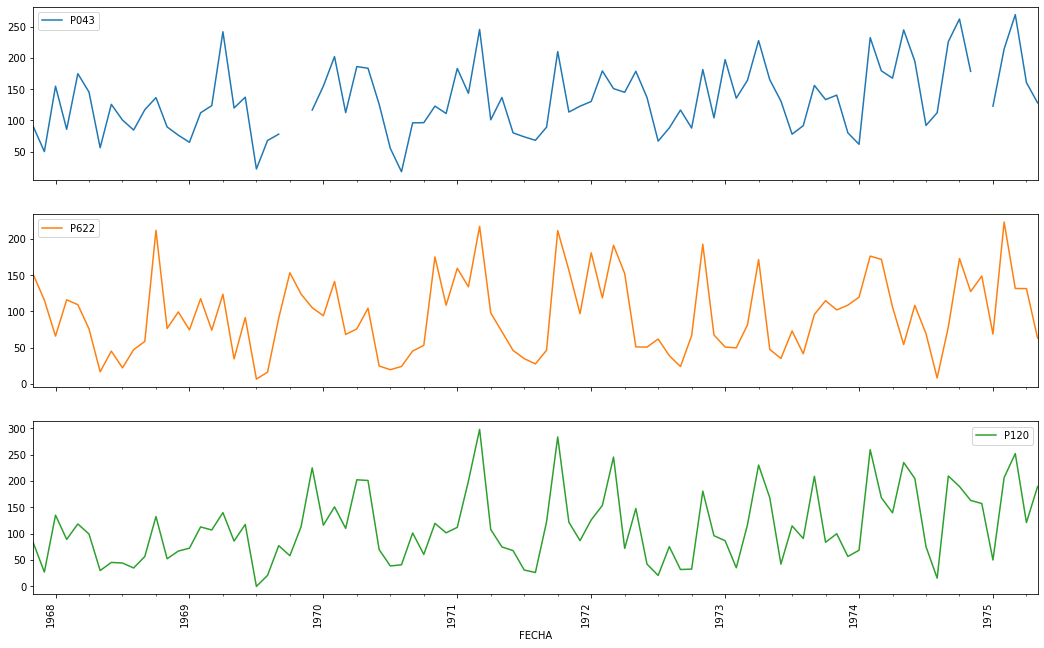

In [4]:
### Excepcion
datos_simulados['P364'] = datos_simulados['P364'].fillna(datos_simulados['P364'].mean())
#### Encontrar el periodo que tenga casi toda la serie completa en las tres estaciones
# Periodo de datos para analisis
inicio = '1967-11-01'
final = '1975-05-01'
rango_analisis = [inicio,final]
#seleccionar las estaciones a intervenir
estaciones_train = ['P043','P622','P120']
# Resumen de vacios en la serie de analisis
analisis_vacios(datos_simulados,rango_analisis,estaciones_train)
# Graficar la serie de analisis
datos_simulados.loc[inicio:final,estaciones_train].plot(subplots=True, figsize=(18, 12)); plt.legend(loc='best')
xticks(rotation='vertical')




Valor Máximo Datos Originales 297.7
Valor Mínimo Datos Originales 0.0
Valor Máximo Datos Simulación 297.7
Valor Mínimo Datos Simulación 0.0
Valor de Correlacion 0.8034279280386434


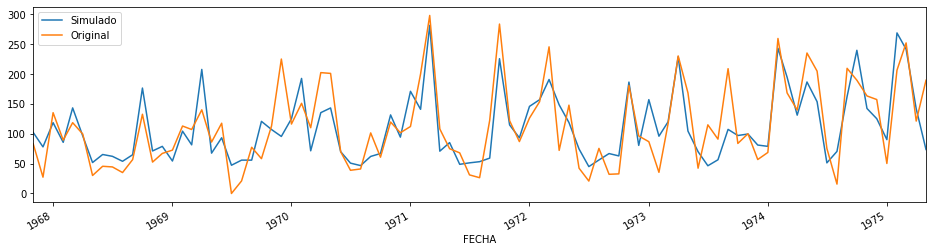

In [5]:
#### Entrenar el modelo para la predicción
# Llenar la serie de datos con los valores promedio
datos_procesar = llenar_serie(datos_simulados,rango_analisis,todas_estaciones)
# entrenar el modelo con tres estaciones para predecir datos
model = entrenar_modelo(datos,datos_procesar,estaciones_train,rango_analisis)

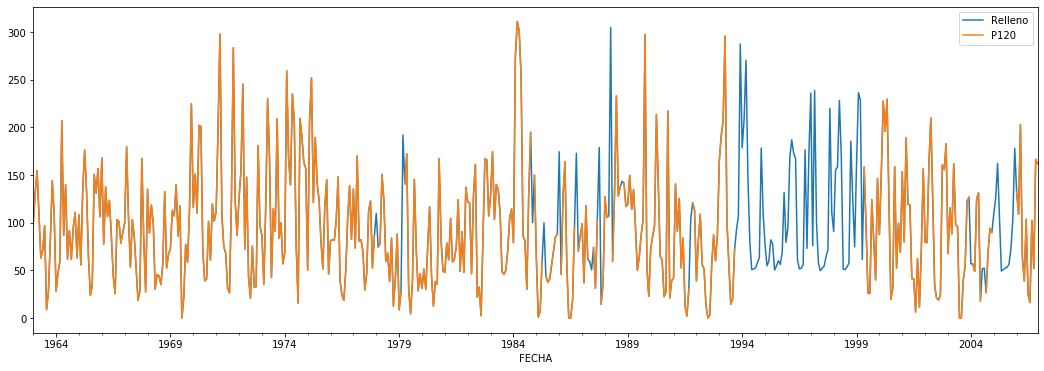

In [6]:
#### Obtener los datos simulados con base al modelo de prediccion
inicio = rango_prediccion[0]
final = rango_prediccion[1]
serie_simulada = pd.DataFrame()
### excepcion por no tener datos en el periodo de relleno
estaciones_train = ['P364','P364','P120']
# generar datos simulados
serie_simulada = get_datos_simulados(model,datos_simulados,estaciones_train,rango_prediccion)
if len(serie_simulada)>0:
    datos_simulados[estaciones_train[2]] = serie_simulada
#graficar los datos de predicción
#plot(datos.loc[inicio:final].index,serie_simulada,label='Simulado')
datos_simulados.loc[:,estaciones_train[2]].plot(label='Relleno')
#graficar los datos de est3
datos.loc[inicio:final,estaciones_train[2]].plot(figsize=(18, 6),); plt.legend(loc='best') 


      Porcentaje Vacios  Total de datos  Numero vacios
P120               0.00             528              0
P364               0.00             528              0
P349              57.77             528            305
P043              62.50             528            330
P121              69.70             528            368
P532              76.70             528            405
P622              82.20             528            434


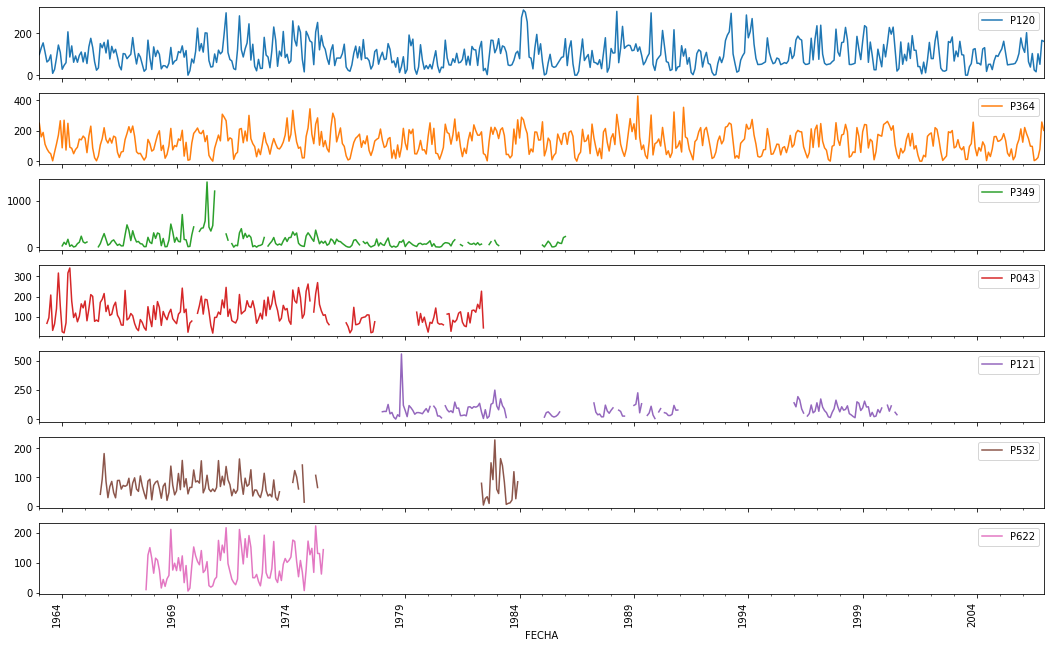

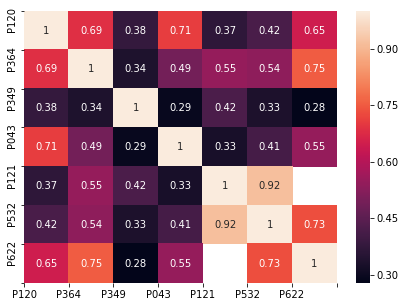

In [7]:
#### Analizar los datos conforme se rellenan
# Periodo de datos para la predicción
inicio = '1963-01-01'
final = '2006-12-01'
rango_prediccion = [inicio,final]
# Graficar los datos
datos_simulados.loc[:,todas_estaciones].plot(subplots=True, figsize=(18, 12)); plt.legend(loc='best')
xticks(rotation='vertical')
# Resumen de vacios en la serie de prediccion
analisis_vacios(datos_simulados,rango_prediccion,todas_estaciones)
# Calcular correlacion entre estaciones
calcular_correlacion(datos_simulados.loc[:,todas_estaciones])

      Porcentaje Vacios  Total de datos  Numero vacios
P532                0.0              71              0
P364                0.0              71              0
P622                0.0              71              0


(array([-24, -12,   0,  12,  24,  36]), <a list of 6 Text xticklabel objects>)

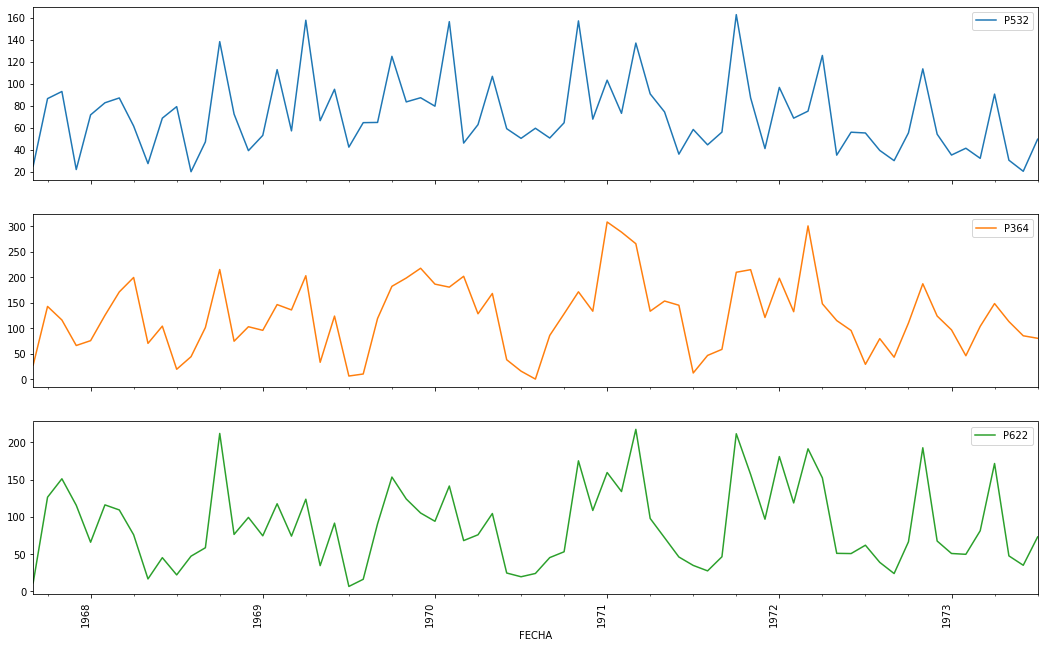

In [8]:
#### Encontrar el periodo que tenga casi toda la serie completa en las tres estaciones
# Periodo de datos para analisis
inicio = '1967-09-01'
final = '1973-07-01'
rango_analisis = [inicio,final]
#seleccionar las estaciones a intervenir
estaciones_train = ['P532','P364','P622']
# Resumen de vacios en la serie de analisis
analisis_vacios(datos_simulados,rango_analisis,estaciones_train)
# Graficar la serie de analisis
datos_simulados.loc[inicio:final,estaciones_train].plot(subplots=True, figsize=(18, 12)); plt.legend(loc='best')
xticks(rotation='vertical')

Valor Máximo Datos Originales 217.3
Valor Mínimo Datos Originales 6.6
Valor Máximo Datos Simulación 217.3
Valor Mínimo Datos Simulación 6.6
Valor de Correlacion 0.8132001501396119


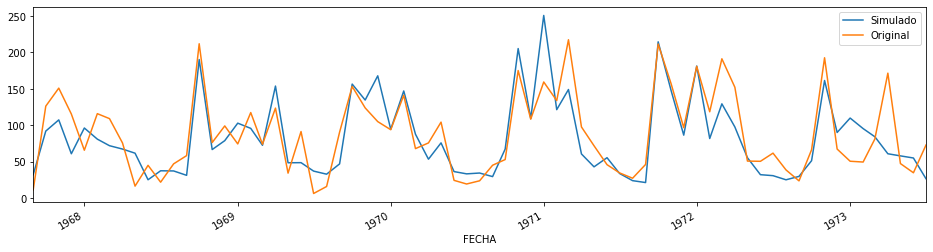

In [9]:
#### Entrenar el modelo para la predicción
# Regresar los datos a los valores originales
datos_simulados[estaciones_train[2]] = datos[estaciones_train[2]]
# Llenar la serie de datos con los valores promedio
datos_procesar = llenar_serie(datos_simulados,rango_analisis,todas_estaciones)
# entrenar el modelo con tres estaciones para predecir datos
model = entrenar_modelo(datos,datos_procesar,estaciones_train,rango_analisis)

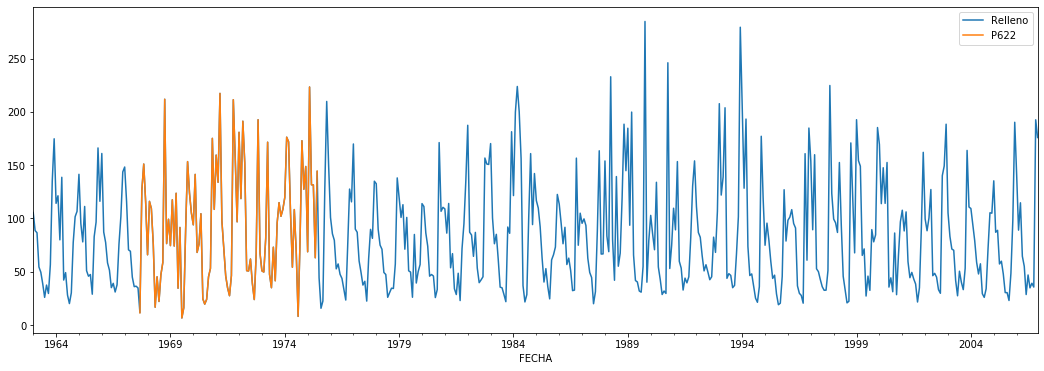

In [10]:
#### Obtener los datos simulados con base al modelo de prediccion
inicio = rango_prediccion[0]
final = rango_prediccion[1]
serie_simulada = pd.DataFrame()
### excepcion por no tener datos en el periodo de relleno
estaciones_train = ['P120','P364','P622']
# generar datos simulados
serie_simulada = get_datos_simulados(model,datos_simulados,estaciones_train,rango_prediccion)
if len(serie_simulada)>0:
    datos_simulados[estaciones_train[2]] = serie_simulada
#graficar los datos de predicción
#plot(datos.loc[inicio:final].index,serie_simulada,label='Simulado')
datos_simulados.loc[:,estaciones_train[2]].plot(label='Relleno')
#graficar los datos de est3
datos.loc[inicio:final,estaciones_train[2]].plot(figsize=(18, 6),); plt.legend(loc='best') 

      Porcentaje Vacios  Total de datos  Numero vacios
P120               0.00             528              0
P364               0.00             528              0
P349              57.77             528            305
P043              62.50             528            330
P121              69.70             528            368
P532              76.70             528            405
P622               0.00             528              0


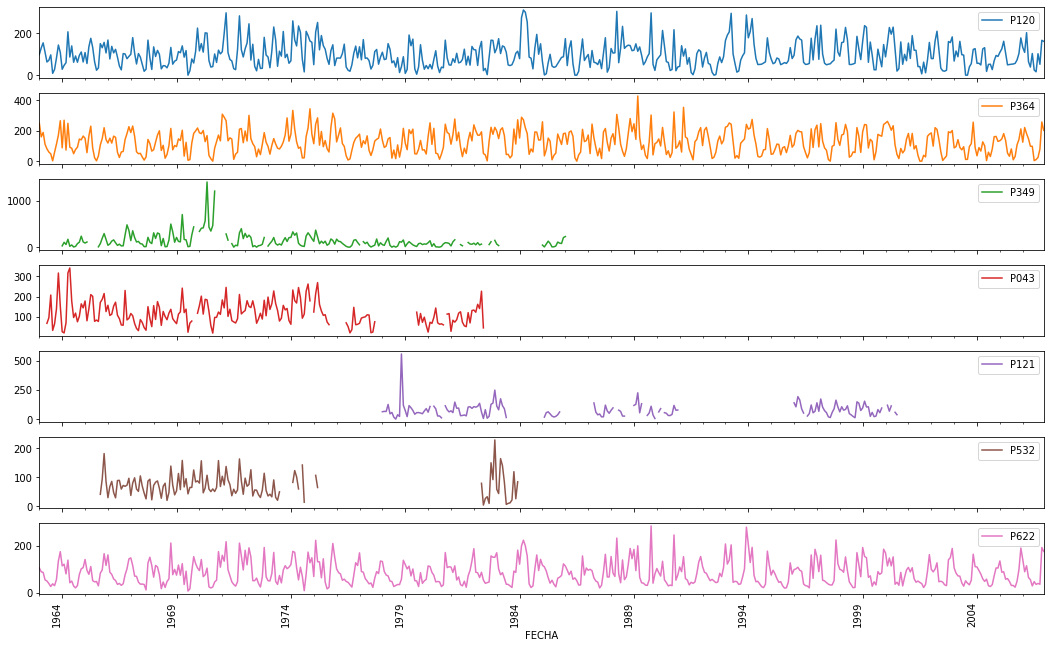

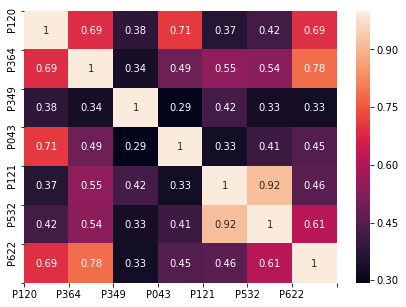

In [11]:
#### Analizar los datos conforme se rellenan
# Periodo de datos para la predicción
inicio = '1963-01-01'
final = '2006-12-01'
rango_prediccion = [inicio,final]
# Graficar los datos
datos_simulados.loc[:,todas_estaciones].plot(subplots=True, figsize=(18, 12)); plt.legend(loc='best')
xticks(rotation='vertical')
# Resumen de vacios en la serie de prediccion
analisis_vacios(datos_simulados,rango_prediccion,todas_estaciones)
# Calcular correlacion entre estaciones
calcular_correlacion(datos_simulados.loc[:,todas_estaciones])

      Porcentaje Vacios  Total de datos  Numero vacios
P120               0.00             146              0
P364               0.00             146              0
P043               0.57             146              3


(array([-60, -36, -12,  12,  36,  60]), <a list of 6 Text xticklabel objects>)

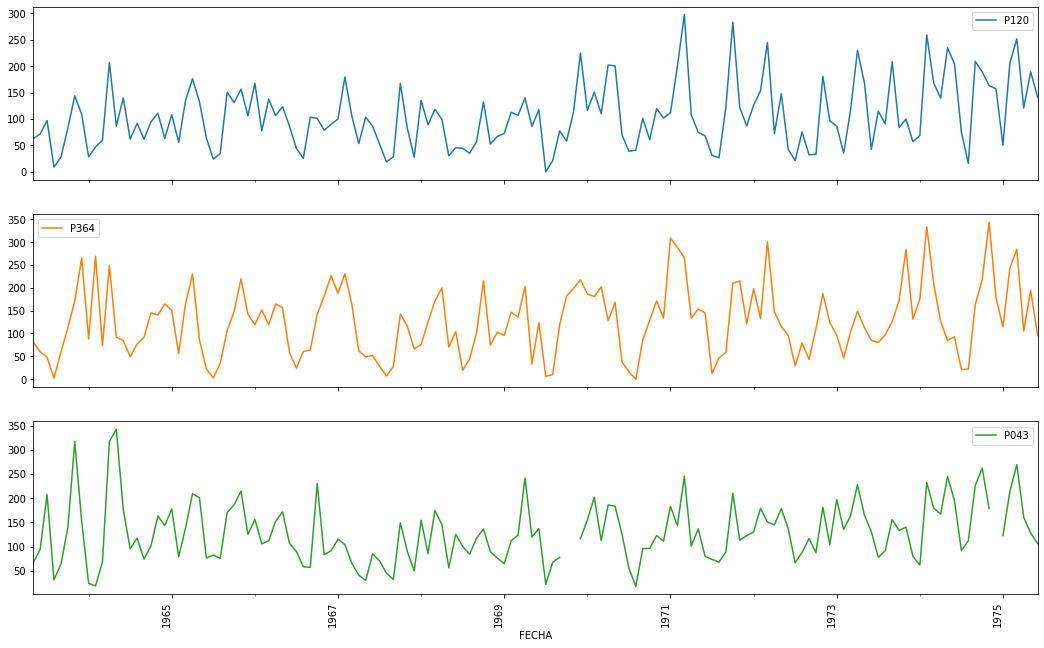

In [12]:
#### Encontrar el periodo que tenga casi toda la serie completa en las tres estaciones
# Periodo de datos para analisis
inicio = '1963-05-01'
final = '1975-06-01'
rango_analisis = [inicio,final]
#seleccionar las estaciones a intervenir
estaciones_train = ['P120','P364','P043']
# Resumen de vacios en la serie de analisis
analisis_vacios(datos_simulados,rango_analisis,estaciones_train)
# Graficar la serie de analisis
datos_simulados.loc[inicio:final,estaciones_train].plot(subplots=True, figsize=(18, 12)); plt.legend(loc='best')
xticks(rotation='vertical')

Valor Máximo Datos Originales 342.2
Valor Mínimo Datos Originales 18.0
Valor Máximo Datos Simulación 342.2
Valor Mínimo Datos Simulación 18.0
Valor de Correlacion 0.5227797340764101


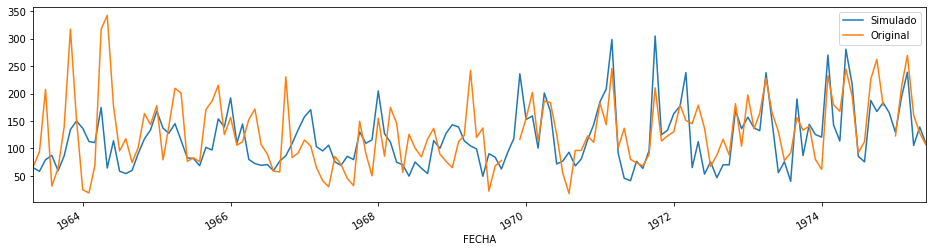

In [14]:
#### Entrenar el modelo para la predicción
# Regresar los datos a los valores originales
datos_simulados[estaciones_train[2]] = datos[estaciones_train[2]]
# Llenar la serie de datos con los valores promedio
datos_procesar = llenar_serie(datos_simulados,rango_analisis,todas_estaciones)
# entrenar el modelo con tres estaciones para predecir datos
model = entrenar_modelo(datos,datos_procesar,estaciones_train,rango_analisis)

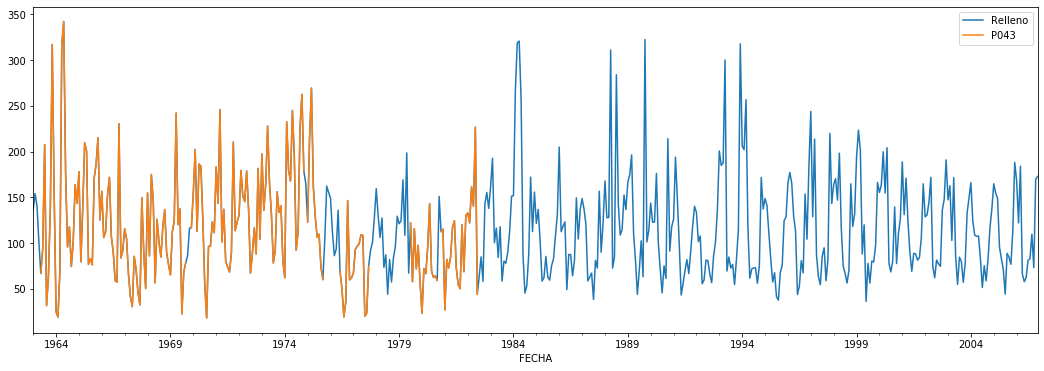

In [17]:
#### Obtener los datos simulados con base al modelo de prediccion
inicio = rango_prediccion[0]
final = rango_prediccion[1]
serie_simulada = pd.DataFrame()
### excepcion por no tener datos en el periodo de relleno
estaciones_train = ['P120','P364','P043']
# generar datos simulados
serie_simulada = get_datos_simulados(model,datos_simulados,estaciones_train,rango_prediccion)
if len(serie_simulada)>0:
    datos_simulados[estaciones_train[2]] = serie_simulada
#graficar los datos de predicción
#plot(datos.loc[inicio:final].index,serie_simulada,label='Simulado')
datos_simulados.loc[:,estaciones_train[2]].plot(label='Relleno')
#graficar los datos de est3
datos.loc[inicio:final,estaciones_train[2]].plot(figsize=(18, 6),); plt.legend(loc='best')   

      Porcentaje Vacios  Total de datos  Numero vacios
P120               0.00             528              0
P364               0.00             528              0
P349              57.77             528            305
P043               0.00             528              0
P121              69.70             528            368
P532              76.70             528            405
P622               0.00             528              0


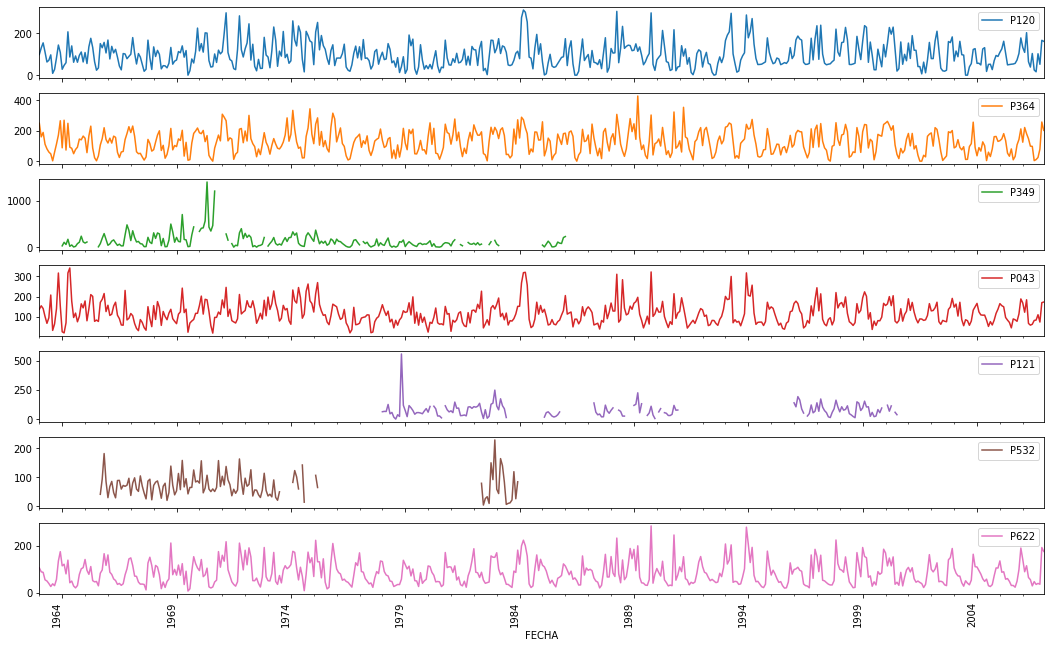

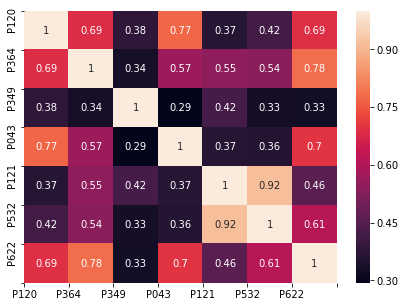

In [18]:
#### Analizar los datos conforme se rellenan
# Periodo de datos para la predicción
inicio = '1963-01-01'
final = '2006-12-01'
rango_prediccion = [inicio,final]
# Graficar los datos
datos_simulados.loc[:,todas_estaciones].plot(subplots=True, figsize=(18, 12)); plt.legend(loc='best')
xticks(rotation='vertical')
# Resumen de vacios en la serie de prediccion
analisis_vacios(datos_simulados,rango_prediccion,todas_estaciones)
# Calcular correlacion entre estaciones
calcular_correlacion(datos_simulados.loc[:,todas_estaciones])

      Porcentaje Vacios  Total de datos  Numero vacios
P364                0.0              93              0
P622                0.0              93              0
P532                0.0              93              0


(array([-48, -36, -24, -12,   0,  12,  24,  36]),
 <a list of 8 Text xticklabel objects>)

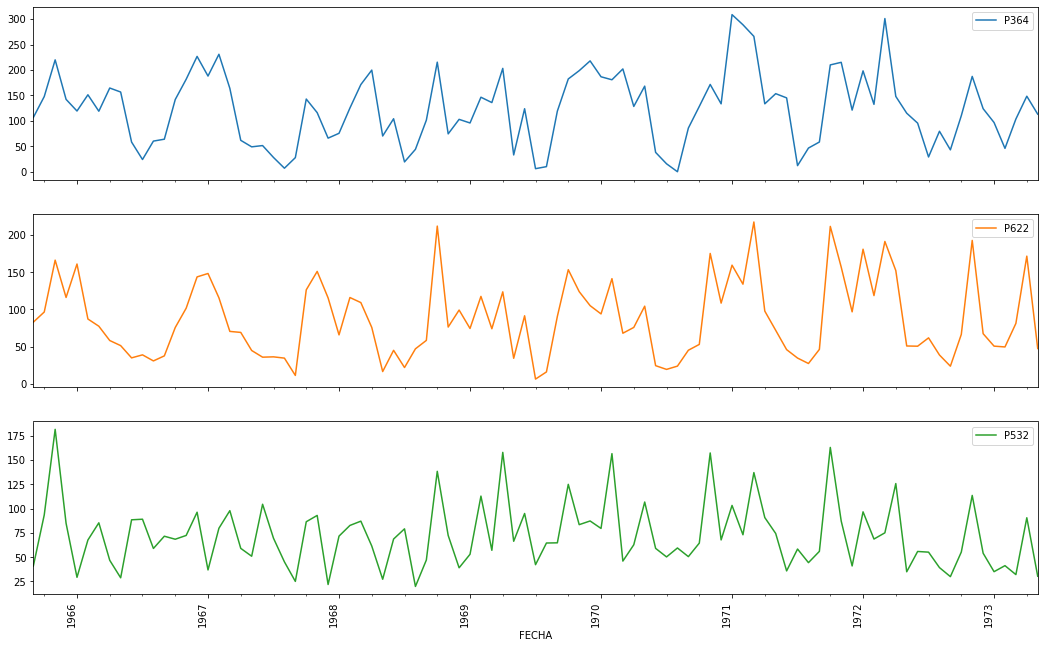

In [20]:
#### Encontrar el periodo que tenga casi toda la serie completa en las tres estaciones
# Periodo de datos para analisis
inicio = '1965-09-01'
final = '1973-05-01'
rango_analisis = [inicio,final]
#seleccionar las estaciones a intervenir
estaciones_train = ['P364','P622','P532']
# Resumen de vacios en la serie de analisis
analisis_vacios(datos_simulados,rango_analisis,estaciones_train)
# Graficar la serie de analisis
datos_simulados.loc[inicio:final,estaciones_train].plot(subplots=True, figsize=(18, 12)); plt.legend(loc='best')
xticks(rotation='vertical')

Valor Máximo Datos Originales 181.5
Valor Mínimo Datos Originales 19.8
Valor Máximo Datos Simulación 181.5
Valor Mínimo Datos Simulación 19.8
Valor de Correlacion 0.534046698884328


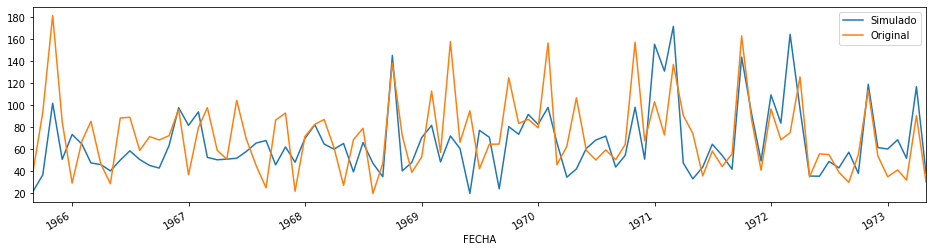

In [21]:
#### Entrenar el modelo para la predicción
# Regresar los datos a los valores originales
datos_simulados[estaciones_train[2]] = datos[estaciones_train[2]]
# Llenar la serie de datos con los valores promedio
datos_procesar = llenar_serie(datos_simulados,rango_analisis,todas_estaciones)
# entrenar el modelo con tres estaciones para predecir datos
model = entrenar_modelo(datos,datos_procesar,estaciones_train,rango_analisis)

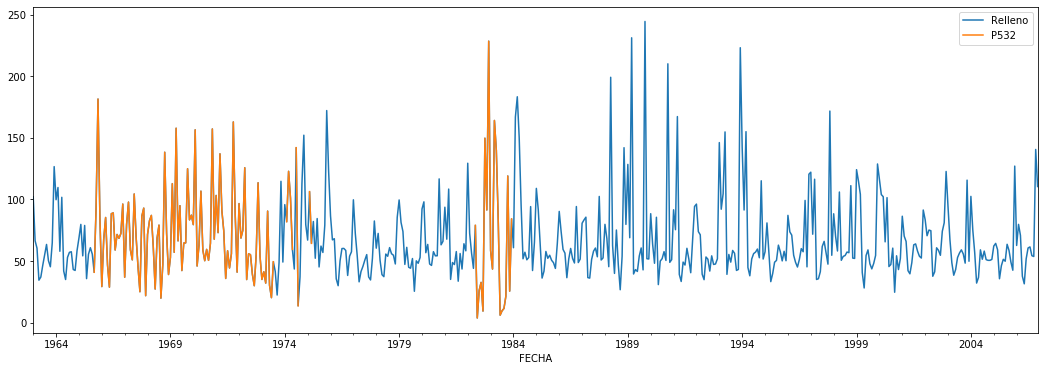

In [22]:
#### Obtener los datos simulados con base al modelo de prediccion
inicio = rango_prediccion[0]
final = rango_prediccion[1]
serie_simulada = pd.DataFrame()
# generar datos simulados
serie_simulada = get_datos_simulados(model,datos_simulados,estaciones_train,rango_prediccion)
if len(serie_simulada)>0:
    datos_simulados[estaciones_train[2]] = serie_simulada
#graficar los datos de predicción
#plot(datos.loc[inicio:final].index,serie_simulada,label='Simulado')
datos_simulados.loc[:,estaciones_train[2]].plot(label='Relleno')
#graficar los datos de est3
datos.loc[inicio:final,estaciones_train[2]].plot(figsize=(18, 6),); plt.legend(loc='best')   

      Porcentaje Vacios  Total de datos  Numero vacios
P120               0.00             528              0
P364               0.00             528              0
P349              57.77             528            305
P043               0.00             528              0
P121              69.70             528            368
P532               0.00             528              0
P622               0.00             528              0


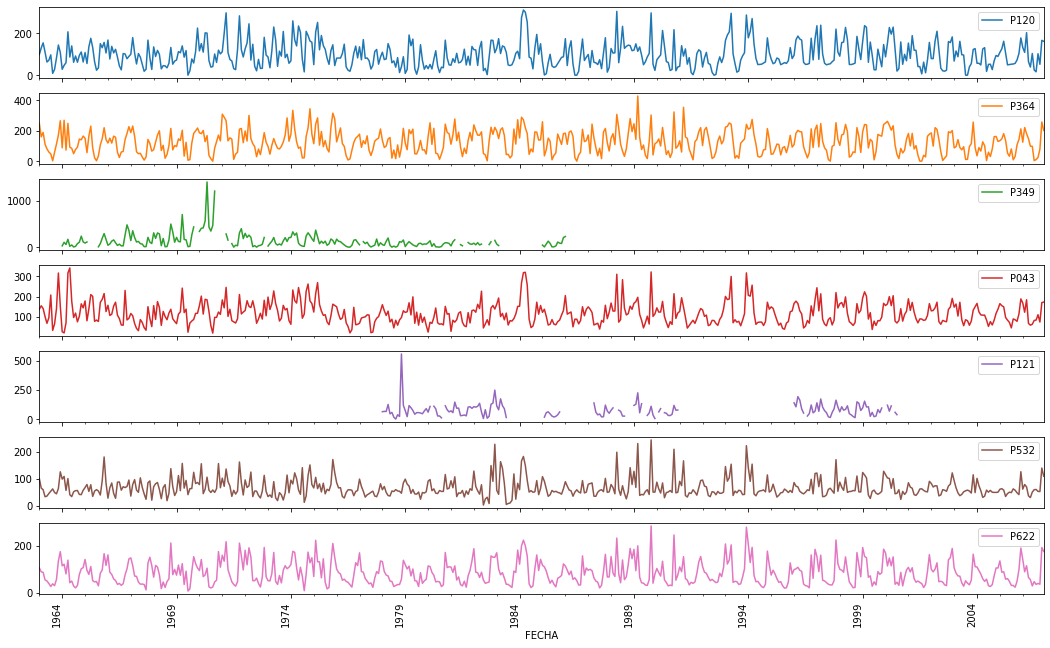

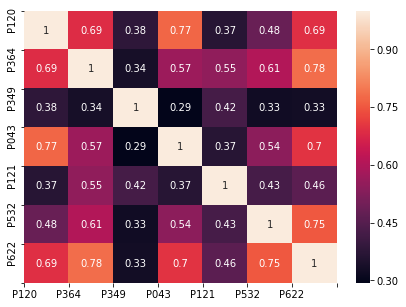

In [23]:
#### Analizar los datos conforme se rellenan
# Periodo de datos para la predicción
inicio = '1963-01-01'
final = '2006-12-01'
rango_prediccion = [inicio,final]
# Graficar los datos
datos_simulados.loc[:,todas_estaciones].plot(subplots=True, figsize=(18, 12)); plt.legend(loc='best')
xticks(rotation='vertical')
# Resumen de vacios en la serie de prediccion
analisis_vacios(datos_simulados,rango_prediccion,todas_estaciones)
# Calcular correlacion entre estaciones
calcular_correlacion(datos_simulados.loc[:,todas_estaciones])

      Porcentaje Vacios  Total de datos  Numero vacios
P364               0.00              80              0
P622               0.00              80              0
P121               3.03              80             16


(array([ 96, 108, 120, 132, 144, 156, 168]),
 <a list of 7 Text xticklabel objects>)

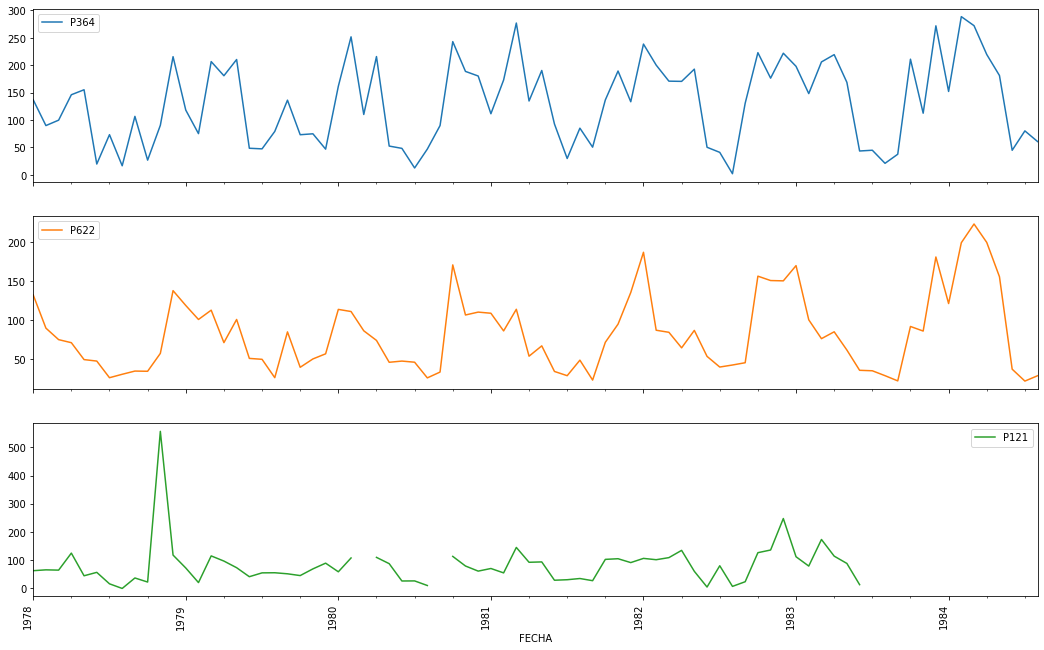

In [24]:
#### Encontrar el periodo que tenga casi toda la serie completa en las tres estaciones
# Periodo de datos para analisis
inicio = '1978-01-01'
final = '1984-08-01'
rango_analisis = [inicio,final]
#seleccionar las estaciones a intervenir
estaciones_train = ['P364','P622','P121']
# Resumen de vacios en la serie de analisis
analisis_vacios(datos_simulados,rango_analisis,estaciones_train)
# Graficar la serie de analisis
datos_simulados.loc[inicio:final,estaciones_train].plot(subplots=True, figsize=(18, 12)); plt.legend(loc='best')
xticks(rotation='vertical')

Valor Máximo Datos Originales 556.6
Valor Mínimo Datos Originales 0.0
Valor Máximo Datos Simulación 556.6
Valor Mínimo Datos Simulación 0.0
Valor de Correlacion 0.4235580544931402


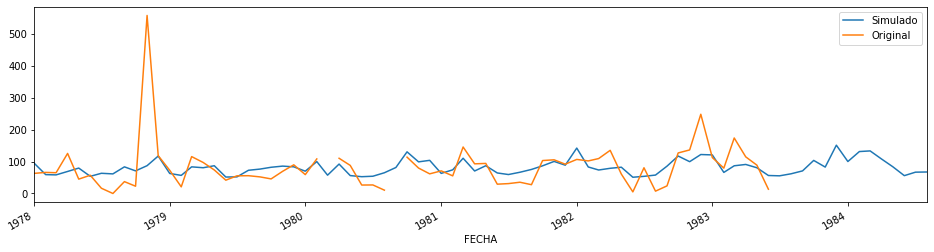

In [30]:
#### Entrenar el modelo para la predicción
# Regresar los datos a los valores originales
datos_simulados[estaciones_train[2]] = datos[estaciones_train[2]]
# Llenar la serie de datos con los valores promedio
datos_procesar = llenar_serie(datos_simulados,rango_analisis,todas_estaciones)
# entrenar el modelo con tres estaciones para predecir datos
model = entrenar_modelo(datos,datos_procesar,estaciones_train,rango_analisis)

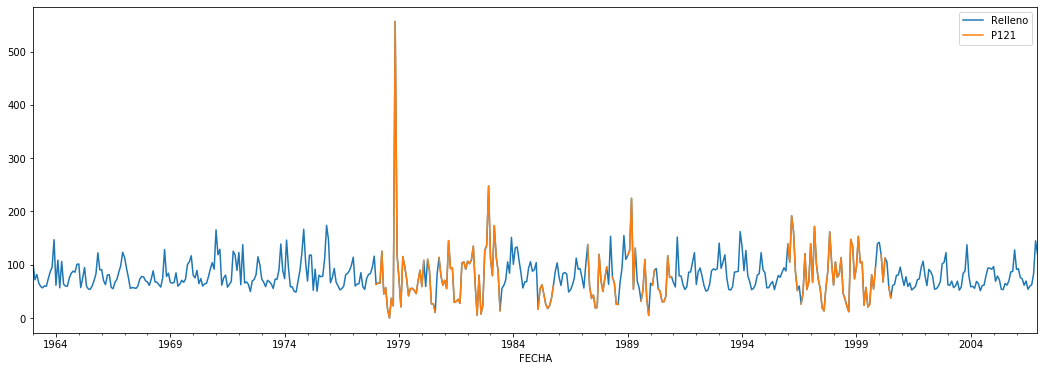

In [31]:
#### Obtener los datos simulados con base al modelo de prediccion
inicio = rango_prediccion[0]
final = rango_prediccion[1]
serie_simulada = pd.DataFrame()
# generar datos simulados
serie_simulada = get_datos_simulados(model,datos_simulados,estaciones_train,rango_prediccion)
if len(serie_simulada)>0:
    datos_simulados[estaciones_train[2]] = serie_simulada
#graficar los datos de predicción
#plot(datos.loc[inicio:final].index,serie_simulada,label='Simulado')
datos_simulados.loc[:,estaciones_train[2]].plot(label='Relleno')
#graficar los datos de est3
datos.loc[inicio:final,estaciones_train[2]].plot(figsize=(18, 6),); plt.legend(loc='best')   

      Porcentaje Vacios  Total de datos  Numero vacios
P120               0.00             528              0
P364               0.00             528              0
P349              57.77             528            305
P043               0.00             528              0
P121               0.00             528              0
P532               0.00             528              0
P622               0.00             528              0


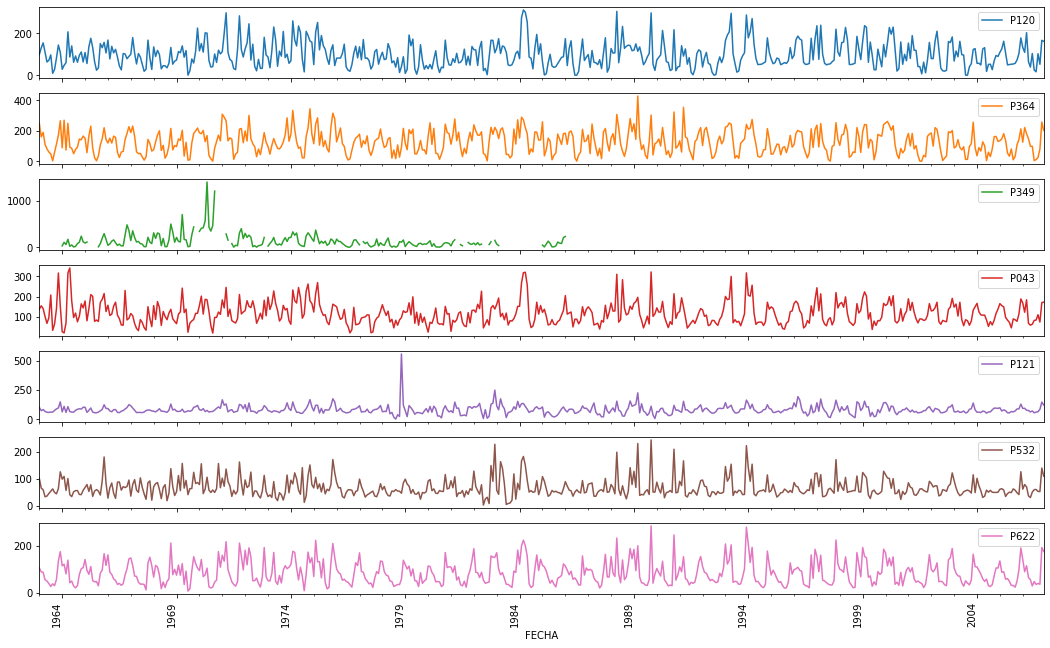

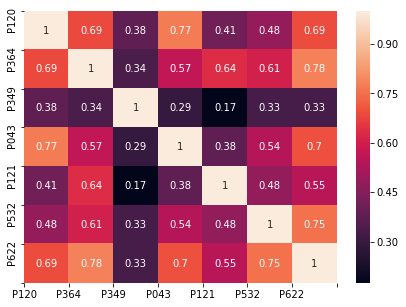

In [32]:
#### Analizar los datos conforme se rellenan
# Periodo de datos para la predicción
inicio = '1963-01-01'
final = '2006-12-01'
rango_prediccion = [inicio,final]
# Graficar los datos
datos_simulados.loc[:,todas_estaciones].plot(subplots=True, figsize=(18, 12)); plt.legend(loc='best')
xticks(rotation='vertical')
# Resumen de vacios en la serie de prediccion
analisis_vacios(datos_simulados,rango_prediccion,todas_estaciones)
# Calcular correlacion entre estaciones
calcular_correlacion(datos_simulados.loc[:,todas_estaciones])

      Porcentaje Vacios  Total de datos  Numero vacios
P120               0.00             240              0
P364               0.00             240              0
P349               5.87             240             31


(array([-72, -12,  48, 108]), <a list of 4 Text xticklabel objects>)

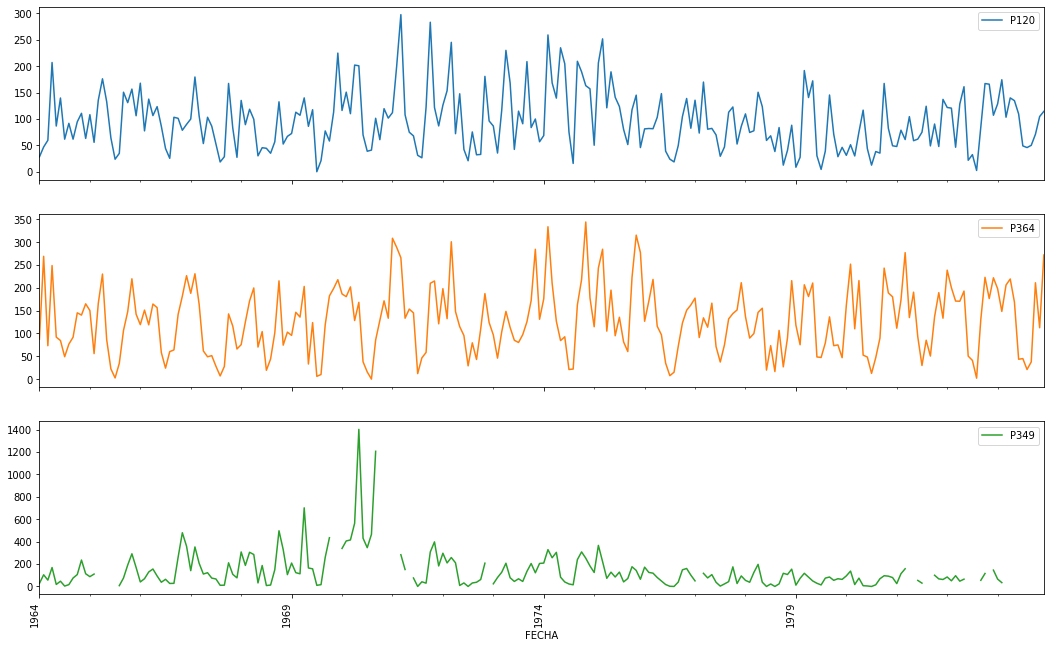

In [38]:
#### Encontrar el periodo que tenga casi toda la serie completa en las tres estaciones
# Periodo de datos para analisis
inicio = '1964-01-01'
final = '1983-12-01'
rango_analisis = [inicio,final]
#seleccionar las estaciones a intervenir
estaciones_train = ['P120','P364','P349']
# Resumen de vacios en la serie de analisis
analisis_vacios(datos_simulados,rango_analisis,estaciones_train)
# Graficar la serie de analisis
datos_simulados.loc[inicio:final,estaciones_train].plot(subplots=True, figsize=(18, 12)); plt.legend(loc='best')
xticks(rotation='vertical')

Valor Máximo Datos Originales 1402.0
Valor Mínimo Datos Originales 0.0
Valor Máximo Datos Simulación 1402.0
Valor Mínimo Datos Simulación 0.0
Valor de Correlacion 0.4015351736107634


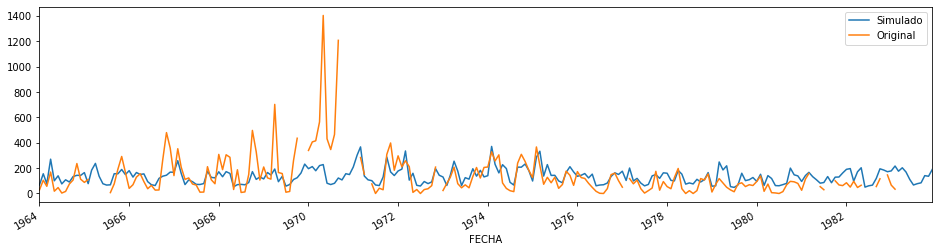

In [40]:
#### Entrenar el modelo para la predicción
# Regresar los datos a los valores originales
datos_simulados[estaciones_train[2]] = datos[estaciones_train[2]]
# Llenar la serie de datos con los valores promedio
datos_procesar = llenar_serie(datos_simulados,rango_analisis,todas_estaciones)
# entrenar el modelo con tres estaciones para predecir datos
model = entrenar_modelo(datos,datos_procesar,estaciones_train,rango_analisis)

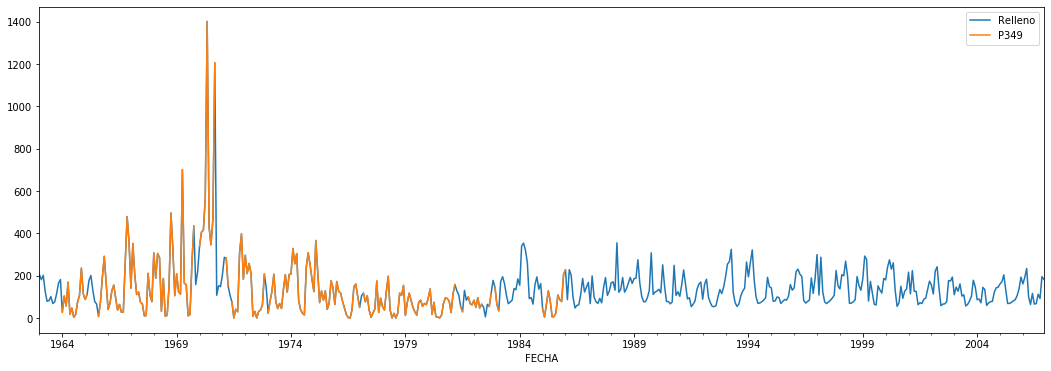

In [41]:
#### Obtener los datos simulados con base al modelo de prediccion
inicio = rango_prediccion[0]
final = rango_prediccion[1]
serie_simulada = pd.DataFrame()
# generar datos simulados
serie_simulada = get_datos_simulados(model,datos_simulados,estaciones_train,rango_prediccion)
if len(serie_simulada)>0:
    datos_simulados[estaciones_train[2]] = serie_simulada
#graficar los datos de predicción
#plot(datos.loc[inicio:final].index,serie_simulada,label='Simulado')
datos_simulados.loc[:,estaciones_train[2]].plot(label='Relleno')
#graficar los datos de est3
datos.loc[inicio:final,estaciones_train[2]].plot(figsize=(18, 6),); plt.legend(loc='best')  

      Porcentaje Vacios  Total de datos  Numero vacios
P120              10.06             528             93
P364               0.11             528              1
P349              33.01             528            305
P043              35.71             528            330
P121              39.83             528            368
P532              43.83             528            405
P622              46.97             528            434
Correlación Inicial


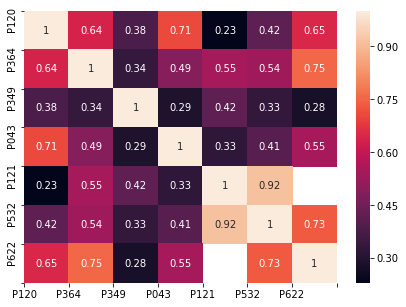

Correlación Final


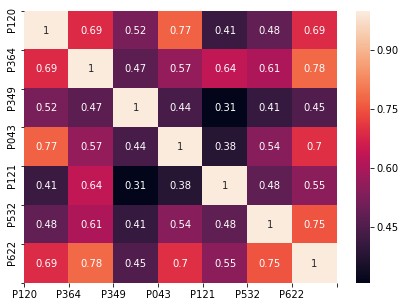

In [43]:
#### Analisis Final
# Periodo de datos para la predicción
inicio = '1963-01-01'
final = '2006-12-01'
rango_prediccion = [inicio,final]
# Resumen de vacios en la serie de prediccion
analisis_vacios(datos,rango_prediccion,todas_estaciones)
print("Correlación Inicial")
calcular_correlacion(datos.loc[inicio:final,todas_estaciones])
# Calcular correlacion entre estaciones
print("Correlación Final")
calcular_correlacion(datos_simulados.loc[:,todas_estaciones])

In [45]:
# exportar los datos a excel
datos_simulados.describe()
datos_simulados.loc[:,todas_estaciones].to_excel('datos_rellenados.xlsx')